In [14]:
!pip install pandas_datareader
!pip install tensorflow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [16]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import yfinance as yf

df = yf.download('ADANIPOWER.NS', start='2020-01-01', end='2022-04-15')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,61.799999,64.300003,61.549999,63.900002,63.900002,16415397
2020-01-02,64.000000,64.849998,63.400002,64.449997,64.449997,10996418
2020-01-03,64.400002,64.949997,62.700001,63.250000,63.250000,8114232
2020-01-06,63.000000,63.250000,59.500000,60.099998,60.099998,9700870
2020-01-07,60.349998,61.750000,59.650002,61.000000,61.000000,8704020


In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [27]:
training_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - training_size
train_data, test_data = scaled_data[0:training_size,:], scaled_data[training_size:len(scaled_data),:]


In [20]:
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [21]:
time_steps = 60
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
7/7 [==============================] - 13s 482ms/step - loss: 0.0294 - val_loss: 0.0281
Epoch 2/100
7/7 [==============================] - 1s 165ms/step - loss: 0.0098 - val_loss: 0.0818
Epoch 3/100
7/7 [==============================] - 1s 173ms/step - loss: 0.0067 - val_loss: 0.0332
Epoch 4/100
7/7 [==============================] - 1s 162ms/step - loss: 0.0032 - val_loss: 0.0246
Epoch 5/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0022 - val_loss: 0.0250
Epoch 6/100
7/7 [==============================] - 1s 175ms/step - loss: 0.0021 - val_loss: 0.0231
Epoch 7/100
7/7 [==============================] - 1s 159ms/step - loss: 0.0020 - val_loss: 0.0282
Epoch 8/100
7/7 [==============================] - 1s 167ms/step - loss: 0.0018 - val_loss: 0.0248
Epoch 9/100
7/7 [==============================] - 1s 162ms/step - loss: 0.0018 - val_loss: 0.0264
Epoch 10/100
7/7 [==============================] - 1s 151ms/step - loss: 0.0018 - val_loss: 0.0277
Epoch 11

Epoch 82/100
7/7 [==============================] - 1s 161ms/step - loss: 7.0946e-04 - val_loss: 0.0126
Epoch 83/100
7/7 [==============================] - 1s 173ms/step - loss: 7.0145e-04 - val_loss: 0.0116
Epoch 84/100
7/7 [==============================] - 1s 167ms/step - loss: 7.0598e-04 - val_loss: 0.0177
Epoch 85/100
7/7 [==============================] - 1s 146ms/step - loss: 6.4392e-04 - val_loss: 0.0156
Epoch 86/100
7/7 [==============================] - 1s 161ms/step - loss: 6.3743e-04 - val_loss: 0.0144
Epoch 87/100
7/7 [==============================] - 1s 159ms/step - loss: 6.0709e-04 - val_loss: 0.0152
Epoch 88/100
7/7 [==============================] - 1s 162ms/step - loss: 6.1337e-04 - val_loss: 0.0191
Epoch 89/100
7/7 [==============================] - 1s 159ms/step - loss: 6.0209e-04 - val_loss: 0.0125
Epoch 90/100
7/7 [==============================] - 1s 156ms/step - loss: 5.9281e-04 - val_loss: 0.0163
Epoch 91/100
7/7 [==============================] - 1s 150ms/ste

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

2/2 [==============================] - 0s 46ms/step


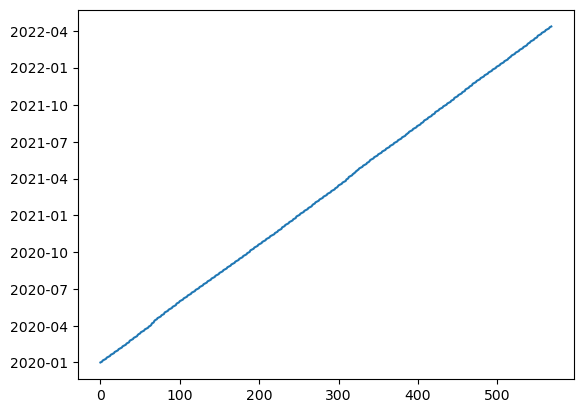

In [25]:
plt.plot(df.index)